# Model Representation

Goals: Learn to implement linear regression model with one variable.



## Notation:

|: ------------|: ------------------------------------------------------------||
|: ------------|: ------------------------------------------------------------||
| $a$ | scalar, non bold                                                      ||
| $\mathbf{a}$ | vector, bold                                                      ||
| **Regression** |         |    |     |
|  $\mathbf{x}$ | Training Example feature values (in this lab - Size (1000 sqft))  | `x_train` |   
|  $\mathbf{y}$  | Training Example  targets (in this lab Price (1000s of dollars))  | `y_train` 
|  $x^{(i)}$, $y^{(i)}$ | $i_{th}$Training Example | `x_i`, `y_i`|
| m | Number of training examples | `m`|
|  $w$  |  parameter: weight                                 | `w`    |
|  $b$           |  parameter: bias                                           | `b`    |     
| $f_{w,b}(x^{(i)})$ | The result of the model evaluation at $x^{(i)}$ parameterized by $w,b$: $f_{w,b}(x^{(i)}) = wx^{(i)}+b$  | `f_wb` | 


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

## Problem Statement


As in the lecture, you will use the motivating example of housing price prediction.  
This lab will use a simple data set with only two data points - a house with 1000 square feet(sqft) sold for 300,000 USD and a house with 2000 square feet sold for 500,000 USD. These two points will constitute our *data or training set*. In this lab, the units of size are 1000 sqft and the units of price are 1000s of dollars.


| Size (1000 sqft)     | Price (1000s of dollars) |
| -------------------| ------------------------ |
| 1.0               | 300                      |
| 2.0               | 500                      |


You would like to fit a linear regression model (shown above as the blue straight line) through these two points, so you can then predict price for other houses - say, a house with 1200 sqft.


In [5]:
# x_train is the input vairable (unit in 1000s of square feet)
# y_train is the target price (price in 1000s of dollars)

x_train = np.array([1.0, 2.0])
y_train = np.array([300.0, 500.0])

print(f'x_train: {x_train}')
print(f'y_train: {y_train}')

x_train: [1. 2.]
y_train: [300. 500.]


In [8]:
# m is the number of training examples (the lenfth of x_trian or y_train is equal to m)
m = x_train.shape

print(f'number of training examples: {m}')

number of training examples: (2,)


### Training example `x_i, y_i`

You will use (x$^{(i)}$, y$^{(i)}$) to denote the $i^{th}$ training example. Since Python is zero indexed, (x$^{(0)}$, y$^{(0)}$) is (1.0, 300.0) and (x$^{(1)}$, y$^{(1)}$) is (2.0, 500.0). 

To access a value in a Numpy array, one indexes the array with the desired offset. For example the syntax to access location zero of `x_train` is `x_train[0]`.
Run the next code block below to get the $i^{th}$ training example.

In [9]:
i = 0

x_i = x_train[i]
y_i = y_train[i]

print(f"(x^({i}), y^({i})) = ({x_i}, {y_i})")

(x^(0), y^(0)) = (1.0, 300.0)


### Plot the data

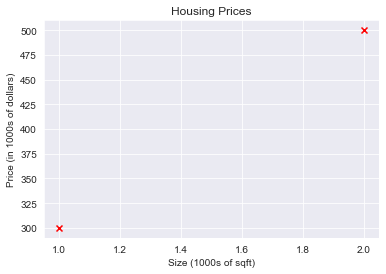

In [11]:
plt.scatter(x_train, y_train, marker='x', c='r')

plt.title('Housing Prices')
plt.ylabel('Price (in 1000s of dollars)')
plt.xlabel('Size (1000s of sqft)')

plt.show()

## Model function

> As described in lecture, the model function for linear regression (which is a function that maps from `x` to `y`) is represented as 

$$ f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$

The formula above is how you can represent straight lines - different values of $w$ and $b$ give you different straight lines on the plot. 

Let's try to get a better intuition for this through the code blocks below. Let's start with $w = 100$ and $b = 100$. 

**Note: You can come back to this cell to adjust the model's w and b parameters**

In [13]:
# randomly selecting w and b parameters
w = 100
b = 100

Now, let's compute the value of $f_{w,b}(x^{(i)})$ for your two data points. You can explicitly write this out for each data point as - 

for $x^{(0)}$, `f_wb = w * x[0] + b`

for $x^{(1)}$, `f_wb = w * x[1] + b`

For a large number of data points, this can get unwieldy and repetitive. So instead, you can calculate the function output in a `for` loop as shown in the `compute_model_output` function below.
> **Note**: The argument description `(ndarray (m,))` describes a Numpy n-dimensional array of shape (m,). `(scalar)` describes an argument without dimensions, just a magnitude.  
> **Note**: `np.zero(n)` will return a one-dimensional numpy array with $n$ entries   

In [17]:
def compute_model_output(x, w, b):
    """
    computes the prediction of a linear model
    Args:
        x (ndarray (m,)): data, m examples
        w,b (scalar)    : model parameters
    returns
        y (ndarray (m,)): target values
    """
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x[i] + b
    return f_wb

Computer the model output function and plot the output...

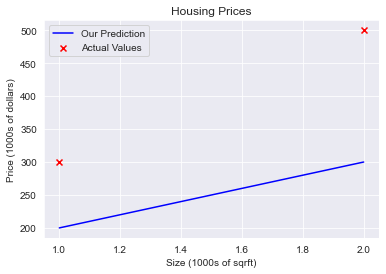

In [21]:
tmp_f_wb = compute_model_output(x_train, w, b)

# plot model prediction (line)
plt.plot(x_train, tmp_f_wb, c='b', label='Our Prediction')

# plot the data points
plt.scatter(x_train, y_train, marker='x', c='r', label='Actual Values')

plt.title('Housing Prices')
plt.ylabel('Price (1000s of dollars)')
plt.xlabel('Size (1000s of sqrft)')

plt.legend()

plt.show()

As you can see, setting $w = 100$ and $b = 100$ does *not* result in a line that fits our data. 

### Challenge
Try experimenting with different values of $w$ and $b$. What should the values be for a line that fits our data?

#### Tip:
You can use your mouse to click on the green "Hints" below to reveal some hints for choosing b and w.

In [39]:
#x_train
tmp_f_wb

array([300., 500.])

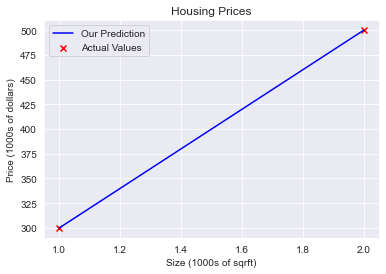

In [42]:
# Experimenting
w = 200
b = 100

tmp_f_wb = compute_model_output(x_train, w, b)

# plot model prediction (line)
plt.plot(x_train, tmp_f_wb, c='b', label='Our Prediction')

# plot the data points
plt.scatter(x_train, y_train, marker='x', c='r', label='Actual Values')

plt.title('Housing Prices')
plt.ylabel('Price (1000s of dollars)')
plt.xlabel('Size (1000s of sqrft)')

plt.legend()

plt.show()

### Prediction
Now that we have a model, we can use it to make our original prediction. 

- y = wx + b
- y = 200x + 100

Let's predict the price of a house with 1200 sqft. Since the units of x are in 1000's of sqft, x is 1.2.

Input (x_i) = 1200 sqft = 1.2 in this model 

In [33]:
w = 200
b = 100
x_i = 1.2

# Predictive Model
y = w * x_i + b

print(f'{x_i}k square feet will cost around ${y}k')

1.2k square feet will cost around $340.0k
